<a href="https://colab.research.google.com/github/osh9149/2022_DataScience/blob/main/2022%EB%85%841%ED%95%99%EA%B8%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 데이터 분석 및 시각화를 위한 패키지 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [3]:
#구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_excel('/content/drive/MyDrive/2022_DataScience/school_location.xlsx', thousands = ',')
df.head()

,시도,행정구,학교명,학교명(영문),설립,우편번호,주소,위도,경도,전화번호,팩스번호,홈페이지
0,강원,강원 춘천시,춘천교육대학교,Chuncheon National University of Education,국립,24328,"강원도 춘천시 공지로 126 (석사동, 춘천교육대학교)",37.859013,127.748348,033-260-6000,033-261-4328,www.cnue.ac.kr
1,강원,강원 강릉시,가톨릭관동대학교,Catholic Kwandong University,사립,25601,"강원도 강릉시 범일로579번길 24 (내곡동, 가톨릭관동대학교)",37.736276,128.874035,033-649-7114,033-649-7874,www.cku.ac.kr
2,강원,강원 강릉시,강릉원주대학교,Gangneung-Wonju National University,국립,25457,"강원도 강릉시 죽헌길 7 (지변동, 강릉원주대학교)",37.770132,128.869074,033-640-7001,033-643-7110,www.gwnu.ac.kr
3,강원,강원 원주시,강릉원주대학교,Gangneung-Wonju National University,국립,26403,"강원도 원주시 흥업면 남원로 150 (흥업리, 강릉원주대학교원주캠퍼스)",37.304697,127.922635,033-760-8114,033-760-8019,www.gwnu.ac.kr
4,강원,강원 춘천시,강원대학교,Kangwon National University,국립,24341,"강원도 춘천시 강원대학길 1 (효자동, 강원대학교)",37.868231,127.744203,033-250-6114,033-251-9556,www.kangwon.ac.kr/


In [38]:
df.tail()

,시도,행정구,학교명,학교명(영문),설립,우편번호,주소,위도,경도,전화번호,팩스번호,홈페이지
294,충북,충북 청주시,충북대학교,Chungbuk National University,국립,28644,"충청북도 청주시 서원구 충대로 1 (개신동, 충북대학교)",36.625900,127.466592,"043-261-2114,3114",043-263-0612,www.chungbuk.ac.kr
295,충북,충북 청주시,한국교원대학교,Korea National University Of Education,국립,28173,"충청북도 청주시 흥덕구 강내면 태성탑연로 250 (다락리, 한국교원대학교)",36.608356,127.358221,043-230-3114,043-233-2960,www.knue.ac.kr
296,충북,충북 충주시,한국교통대학교,KOREA NATIONAL UNIVERSITY OF TRANSPORTATION,국립,27469,"충청북도 충주시 대소원면 대학로 50 (검단리, 한국교통대학교)",36.969728,127.871322,043-841-5000,043-853-1236,www.ut.ac.kr
297,충북,충북 제천시,순복음총회신학교,Korea Christian College,사립,27223,충청북도 제천시 덕산면 도전로 320 (도전리),36.904228,128.167540,043-645-5571,043-642-4530,www.kcc.ac.kr
298,충북,충북 청주시,한국폴리텍IV 대학 청주캠퍼스,Cheongju Campus of Korea Polytechnic,사립,28590,"충청북도 청주시 흥덕구 산단로 54 (송정동, 한국폴리텍Ⅳ대학청주캠퍼스)",36.638963,127.448913,043-279-7400,043-279-7477,www.kopo.ac.kr/cheongju


In [39]:
#위의 데이터프레임중에서 100개만 샘플로 랜덤하게 추출
df=df.sample(n=200)

In [40]:

df1=df.sort_values(by='학교명', ascending=False)
df1

,시도,행정구,학교명,학교명(영문),설립,우편번호,주소,위도,경도,전화번호,팩스번호,홈페이지
152,부산,부산 연제구,화신사이버대학교,Hwashin Cyber University,사립,47558,"부산광역시 연제구 고분로191번길 1 (연산동, 화신사이버대학교)",35.185616,129.103207,051-999-0121,051-999-0119,www.hscu.ac.kr
221,세종,세종,홍익대학교 세종캠퍼스,Hongik University,사립,30016,"세종특별자치시 조치원읍 세종로 2639 (신안리, 홍익대학교세종캠퍼스)",36.620982,127.287357,044-860-2114,044-860-2238,http://sejong.hongik.ac.kr/index.do
196,서울,서울 마포구,홍익대학교,Hongik University,사립,4066,"서울특별시 마포구 와우산로 94 (상수동, 홍익대학교)",37.548424,126.925234,02-320-1114,02-320-1122,www.hongik.ac.kr/
257,전북,전북 군산시,호원대학교,HOWON University,사립,54058,"전라북도 군산시 임피면 호원대3길 64 (월하리, 호원대학교)",35.966034,126.864882,063-450-7114,063-450-7777,www.howon.ac.kr
279,충남,충남 아산시,호서대학교,HOSEO University,사립,31499,"충청남도 아산시 배방읍 호서로79번길 20 (세출리, 호서대학교)",36.735749,127.074761,041-540-5114,041-540-5159,www.hoseo.ac.kr
...,...,...,...,...,...,...,...,...,...,...,...,...
155,서울,서울 서초구,가톨릭대학교,The Catholic University of Korea,사립,6591,"서울특별시 서초구 반포대로 222 (반포동, 가톨릭대학교 성모병원)",37.501769,127.004791,NaN,NaN,songeui.catholic.ac.kr
16,경기,경기 성남시,가천대학교,Gachon University,사립,13120,"경기도 성남시 수정구 성남대로 1342 (복정동, 가천대학교)",37.450713,127.128850,031-750-5114,031-753-8828,www.gachon.ac.kr
133,대전,대전 유성구,LH토지주택대학교,LHU(LH University),사립,34047,"대전광역시 유성구 엑스포로539번길 99 (전민동, LH토지주택연구원)",36.404843,127.400031,NaN,NaN,NaN
201,서울,서울 영등포구,KDB금융대학교,KDB FINANCIAL UNIVERSITY,사립,7242,"서울특별시 영등포구 은행로 14 (여의도동, 산업은행본점)",37.527992,126.920852,02-787-6327,02-787-5595,kfu.kdb.co.kr


In [41]:
name=input('시도명을 입력하세요 : ')

df2=df[(df['시도']==name)]
df2

시도명을 입력하세요 : 부산


,시도,행정구,학교명,학교명(영문),설립,우편번호,주소,위도,경도,전화번호,팩스번호,홈페이지
153,부산,부산 북구,한국폴리텍Ⅶ대학 부산캠퍼스,Busan Campus of Korea PolytechnicⅦ,사립,46550,"부산광역시 북구 만덕대로155번길 99 (덕천동, 한국폴리텍대학부산캠퍼스)",35.218771,129.019035,051-330-7800,051-332-4801,http://www.kopo.ac.kr/busan
143,부산,부산 남구,부경대학교,PUKYONG NATIONAL UNIVERSITY,국립,48513,"부산광역시 남구 용소로 45 (대연동, 부경대학교대연캠퍼스)",35.134032,129.103173,051-629-4114,051-629-5119,www.pknu.ac.kr
147,부산,부산 사상구,신라대학교,SILLA UNIVERSITY,사립,46958,"부산광역시 사상구 백양대로700번길 140 (괘법동, 신라대학교)",35.168166,128.995871,051-999-5000,051-999-5800,www.silla.ac.kr
142,부산,부산 부산진구,동의대학교,Dong-eui University,사립,47340,"부산광역시 부산진구 엄광로 176 (가야동, 동의대학교)",35.142968,129.034091,051-890-1114,051-890-1234,www.deu.ac.kr
150,부산,부산 영도구,한국해양대학교,Korea Maritime & Ocean University,국립,49112,"부산광역시 영도구 태종로 727 (동삼동, 한국해양대학교)",35.076289,129.088975,051-410-4114,051-405-2475,www.kmou.ac.kr/kmou/main.do
140,부산,부산 사상구,동서대학교,DONGSEO UNIVERSITY,사립,47011,"부산광역시 사상구 주례로 47 (주례동, 동서대학교)",35.143916,129.010559,051-313-2001,051-313-1046,www.dongseo.ac.kr
144,부산,부산 금정구,부산가톨릭대학교,CATHOLIC UNIVERSITY OF PUSAN,사립,46252,"부산광역시 금정구 오륜대로 57 (부곡동, 부산가톨릭대학교)",35.244840,129.097803,051-515-5811~5,051-514-1576,www.cup.ac.kr \t\t
136,부산,부산 연제구,부산교육대학교,Busan National University of Education,국립,47503,"부산광역시 연제구 교대로 24 (거제동, 부산교육대학교)",35.195443,129.075095,051-500-7114,051-505-4908,www.bnue.ac.kr
148,부산,부산 해운대구,영산대학교,YOUNGSAN UNIVERSITY,사립,48015,"부산광역시 해운대구 반송순환로 142 (반송동, 영산대학교해운대캠퍼스)",35.223992,129.156078,051-540-7400,051-543-9347,www.ysu.ac.kr
149,부산,부산 부산진구,인제대학교,Inje University,사립,47392,"부산광역시 부산진구 복지로 75 (개금동, 부산백병원)",35.146140,129.020866,051-894-3421,051-895-1864,www.inje.ac.kr


In [42]:
df3=df2.groupby('설립').count()
df3

,시도,행정구,학교명,학교명(영문),우편번호,주소,위도,경도,전화번호,팩스번호,홈페이지
설립,,,,,,,,,,,
국립,3,3,3,3,3,3,3,3,3,3,3
사립,8,8,8,8,8,8,8,8,8,8,8


In [10]:
#폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [11]:
plt.rc('font', family='NanumBarunGothic') 

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'red'
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.edgecolor'] = "b"
plt.rcParams['axes.facecolor'] = "yellow"


Text(0, 0.5, '개수')

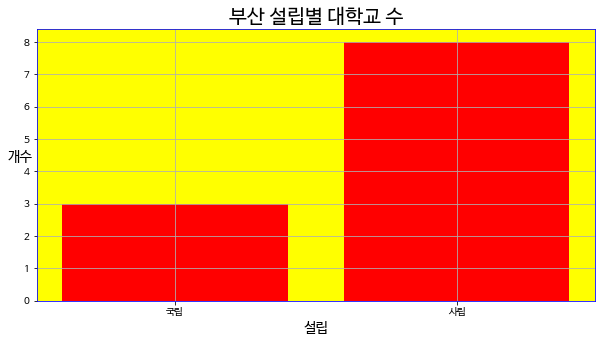

In [43]:
plt.bar(df3.index, df3['행정구'], color='red')

plt.title(name+' 설립별 대학교 수', fontsize=20)
plt.xlabel('설립', fontsize=14)
plt.ylabel('개수',rotation='horizontal',fontsize=14)

In [44]:
df2

,시도,행정구,학교명,학교명(영문),설립,우편번호,주소,위도,경도,전화번호,팩스번호,홈페이지
153,부산,부산 북구,한국폴리텍Ⅶ대학 부산캠퍼스,Busan Campus of Korea PolytechnicⅦ,사립,46550,"부산광역시 북구 만덕대로155번길 99 (덕천동, 한국폴리텍대학부산캠퍼스)",35.218771,129.019035,051-330-7800,051-332-4801,http://www.kopo.ac.kr/busan
143,부산,부산 남구,부경대학교,PUKYONG NATIONAL UNIVERSITY,국립,48513,"부산광역시 남구 용소로 45 (대연동, 부경대학교대연캠퍼스)",35.134032,129.103173,051-629-4114,051-629-5119,www.pknu.ac.kr
147,부산,부산 사상구,신라대학교,SILLA UNIVERSITY,사립,46958,"부산광역시 사상구 백양대로700번길 140 (괘법동, 신라대학교)",35.168166,128.995871,051-999-5000,051-999-5800,www.silla.ac.kr
142,부산,부산 부산진구,동의대학교,Dong-eui University,사립,47340,"부산광역시 부산진구 엄광로 176 (가야동, 동의대학교)",35.142968,129.034091,051-890-1114,051-890-1234,www.deu.ac.kr
150,부산,부산 영도구,한국해양대학교,Korea Maritime & Ocean University,국립,49112,"부산광역시 영도구 태종로 727 (동삼동, 한국해양대학교)",35.076289,129.088975,051-410-4114,051-405-2475,www.kmou.ac.kr/kmou/main.do
140,부산,부산 사상구,동서대학교,DONGSEO UNIVERSITY,사립,47011,"부산광역시 사상구 주례로 47 (주례동, 동서대학교)",35.143916,129.010559,051-313-2001,051-313-1046,www.dongseo.ac.kr
144,부산,부산 금정구,부산가톨릭대학교,CATHOLIC UNIVERSITY OF PUSAN,사립,46252,"부산광역시 금정구 오륜대로 57 (부곡동, 부산가톨릭대학교)",35.244840,129.097803,051-515-5811~5,051-514-1576,www.cup.ac.kr \t\t
136,부산,부산 연제구,부산교육대학교,Busan National University of Education,국립,47503,"부산광역시 연제구 교대로 24 (거제동, 부산교육대학교)",35.195443,129.075095,051-500-7114,051-505-4908,www.bnue.ac.kr
148,부산,부산 해운대구,영산대학교,YOUNGSAN UNIVERSITY,사립,48015,"부산광역시 해운대구 반송순환로 142 (반송동, 영산대학교해운대캠퍼스)",35.223992,129.156078,051-540-7400,051-543-9347,www.ysu.ac.kr
149,부산,부산 부산진구,인제대학교,Inje University,사립,47392,"부산광역시 부산진구 복지로 75 (개금동, 부산백병원)",35.146140,129.020866,051-894-3421,051-895-1864,www.inje.ac.kr


In [45]:
s_lat = df2.loc[df2.index[0], '위도']
s_lng = df2.loc[df2.index[0], '경도']

school_map = folium.Map(
    location=[s_lat,s_lng ], tiles ='OpenStreetMap' , zoom_start=12)

for idx in df2.index:
    lat = df2.loc[idx, '위도']
    lng = df2.loc[idx, '경도']
    
    folium.CircleMarker(
        location=[lat, lng], 
        color='#d0ff00',
        fill_color='#ff0000', 
        fill_opacity=0.9,
        weight=1,
        radius=5
    ).add_to(school_map)

school_map